## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\himan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Read the fuel consumption Data

In [105]:
df = pd.read_csv('fuel.csv')

In [106]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [107]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

### Since, we are learning TensorFlow, to keep things simple we will predict using  Engine_Size, Cylinders, Fuel Consumption only 

In [108]:
df['ones'] = np.ones((1067,1))
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,ones
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,1.0
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,1.0
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,1.0
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,1.0
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,1.0


In [109]:
data = df[['ones','ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]

In [110]:
data = data.values

In [111]:
np.random.shuffle(data)

In [112]:
data.shape

(1067, 8)

##  Split to data into 70% train 30 % test

In [136]:
ntrain = int(data.shape[0]*0.7)
ntest = data.shape[0]- ntrain
xtrain,ytrain = data[0:ntrain+1,0:7],data[0:ntrain+1,7]
xtest,ytest  =  data[ntrain+1:,0:7],data[ntrain+1:,7]

print(ntrain, ntest,xtrain.shape)
print(data[1:5,:])
print(xtrain[1:5,:])
ytrain = ytrain.reshape(747,1)
ytest =  ytest.reshape(320,1)
print(ytrain.shape)

746 321 (747, 7)
[[  1.    3.5   6.   12.    8.9  10.6  27.  244. ]
 [  1.    5.    8.   18.   12.2  15.4  18.  354. ]
 [  1.    2.    4.   11.8   8.3  10.2  28.  235. ]
 [  1.    3.    6.   11.8   8.4  10.3  27.  237. ]]
[[ 1.   3.5  6.  12.   8.9 10.6 27. ]
 [ 1.   5.   8.  18.  12.2 15.4 18. ]
 [ 1.   2.   4.  11.8  8.3 10.2 28. ]
 [ 1.   3.   6.  11.8  8.4 10.3 27. ]]
(747, 1)


## Prediction using TensorFlow

In [214]:
X_in = tf.placeholder(tf.float64, [None, 7], "X_in")
w = tf.Variable(-20 + 40*np.random.rand(7, 1).astype('float64'), name="w")
h = tf.matmul(X_in, w)
y_in = tf.placeholder(tf.float64, [None, 1], "y_in")
loss_op = tf.reduce_mean(tf.square(tf.subtract(y_in, h)))
train_op = tf.train.GradientDescentOptimizer(0.0001).minimize(loss_op)

In [221]:
loss = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10000):
        sess.run(train_op, feed_dict={X_in: xtrain, y_in: ytrain})
        loss.append(sess.run(loss_op,feed_dict={X_in: xtrain, y_in: ytrain}))
    w_computed = sess.run(w)

Train Loss: 649.2896291768152
[[ 2.68285169]
 [ 6.98127704]
 [ 9.92021722]
 [ 8.90433917]
 [-2.24322118]
 [ 3.97277376]
 [ 1.10894006]]
Test Loss: 575.5029195599135


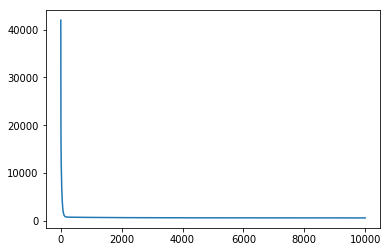

In [223]:
plt.plot(loss)
print(f"Train Loss: {loss[-1]}")
print(w_computed)
yp =  np.matmul(xtest,w_computed)
testloss = np.mean(np.square(yp-ytest))
print(f"Test Loss: {testloss}")


## Prediction Using Sci-kit-Learn

In [230]:
from sklearn.linear_model import LinearRegression

In [231]:
reg = LinearRegression().fit(xtrain,ytrain)

In [232]:
reg.score(xtrain,ytrain)

0.8820956639013948

In [233]:
reg.coef_

array([[  0.        ,  10.23859353,   7.24103207, -17.03774759,
         -8.64628898,  29.24929535,  -3.73355989]])

In [234]:
reg.intercept_

array([248.65985606])

In [238]:
yptrain = reg.predict(xtrain)
yptest = reg.predict(xtest)

In [239]:
print(f"Train loss { np.mean(np.square(yptrain-ytrain)) }")
print(f"Test loss { np.mean(np.square(yptest-ytest)) }")

Train loss 476.6747388935659
Test loss 372.0408535067737


## Analytical Solution

Using the formula: <br/>
$$ W = (X^{T}X)^{-1} (X^{T}Y ) $$

In [224]:
xtx_inv = np.linalg.inv(np.matmul(xtrain.T,xtrain))
xty = np.matmul(xtrain.T, ytrain)
w_analytic = np.matmul(xtx_inv,xty)
print(w_analytic)

yptrain =  np.matmul(xtrain,w_analytic)
trainloss = np.mean(np.square(yptrain-ytrain))
print(f"Train Loss: {trainloss}")

yptest =  np.matmul(xtest,w_analytic)
testloss = np.mean(np.square(yptest-ytest))
print(f"Test Loss: {testloss}")

[[248.65985606]
 [ 10.23859353]
 [  7.24103207]
 [-17.03774759]
 [ -8.64628898]
 [ 29.24929535]
 [ -3.73355989]]
Train Loss: 476.6747388935659
Test Loss: 372.0408535085718
